In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Importing all the required packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)


## Reading and Understanding the Data

Reading and doing EDA on the dataset.

In [3]:
housing = pd.read_csv("train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# inspecting data and identifying total number of rows and for nulls in rows.

print(housing.shape)
print(housing.info())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st     

In [5]:
# Number of missing values in each column.
print(housing.isnull().sum()) 

# Getting the column-wise null percentage
round(100*(housing.isnull().sum()/len(housing.index)),2)   


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [6]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# We will drop all columns having more than 30% of values = null.

housing.dropna(axis=1, thresh=int(0.7*len(housing)), inplace=True)

# Inspecting again
round(100*(housing.isnull().sum()/len(housing.index)),2) 

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

In [8]:
# 5 columns have been dropped as they had more than 30% nulls.

# Checking unique values in each column
housing.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

In [9]:
# Checking for Null Values
for column in housing:
    if housing[column].isnull().any():
       print(column, housing[column].isnull().sum())

LotFrontage 259
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81


From above nulls and validating the data in the file:
1. When MasVnrType is null, than MasVnrArea is also null.
2. All Basement related columns are null when there is no basement.
3. All Garage related columns are null when there is no garage.

In [10]:
# After checking in the given data dictionary NA in certain columns have significance. So, we need to handle accordingly

housing.BsmtQual = housing.BsmtQual.fillna('NO')
housing.BsmtCond= housing.BsmtCond.fillna('NO')
housing.BsmtExposure = housing.BsmtExposure.fillna('NO')
housing.BsmtFinType1 = housing.BsmtFinType1.fillna('NO')
housing.BsmtFinType2 = housing.BsmtFinType2.fillna('NO')
housing.GarageType = housing.GarageType.fillna('NO')
housing.GarageFinish  = housing.GarageFinish.fillna('NO')
housing.GarageQual = housing.GarageQual.fillna('NO')
housing.GarageCond = housing.GarageCond.fillna('NO')


In [11]:
# Let's impute MasVnrType, MasVnrArea and Electrical to most occuring values

for col in ['MasVnrType','MasVnrArea', 'Electrical']:
    print(housing.groupby([col]).size())

MasVnrType
BrkCmn      15
BrkFace    445
None       864
Stone      128
dtype: int64
MasVnrArea
0.0       861
1.0         2
11.0        1
14.0        1
16.0        7
18.0        2
22.0        1
24.0        1
27.0        1
28.0        1
30.0        2
31.0        1
32.0        1
34.0        1
36.0        1
38.0        1
40.0        4
41.0        1
42.0        3
44.0        3
45.0        2
46.0        1
48.0        1
50.0        3
51.0        1
53.0        1
54.0        2
56.0        1
57.0        1
60.0        2
63.0        1
64.0        1
65.0        1
66.0        2
67.0        1
68.0        2
70.0        3
72.0        8
74.0        3
75.0        2
76.0        4
80.0        6
81.0        1
82.0        3
84.0        5
85.0        3
86.0        1
88.0        1
89.0        1
90.0        3
92.0        2
94.0        2
95.0        2
96.0        1
97.0        1
98.0        2
99.0        3
100.0       4
101.0       2
102.0       1
104.0       3
105.0       2
106.0       6
108.0       8
109.0    

In [12]:
# We can either impute these columns or drop such rows.
# 8 rows for MasVnrType, MasVnrArea and 1 row for Electrical.

# Imputing these columns to most occuring values. 
housing.MasVnrType = housing.MasVnrType.fillna('None')
housing.MasVnrArea = housing.MasVnrArea.fillna(0.0)
housing.Electrical = housing.Electrical.fillna('SBrkr')

# GarageYrBlt is null in case there is no garage. Lets impute this to YearBuilt
housing.GarageYrBlt = housing.GarageYrBlt.fillna(housing.YearBuilt)


In [13]:
# Imputing LotFrontage to its mode

print(housing.groupby(['LotFrontage']).size())

housing.LotFrontage = housing.LotFrontage.fillna(60)

LotFrontage
21.0      23
24.0      19
30.0       6
32.0       5
33.0       1
34.0      10
35.0       9
36.0       6
37.0       5
38.0       1
39.0       1
40.0      12
41.0       6
42.0       4
43.0      12
44.0       9
45.0       3
46.0       1
47.0       5
48.0       6
49.0       4
50.0      57
51.0      15
52.0      14
53.0      10
54.0       6
55.0      17
56.0       5
57.0      12
58.0       7
59.0      13
60.0     143
61.0       8
62.0       9
63.0      17
64.0      19
65.0      44
66.0      15
67.0      12
68.0      19
69.0      11
70.0      70
71.0      12
72.0      17
73.0      18
74.0      15
75.0      53
76.0      11
77.0       9
78.0      25
79.0      17
80.0      69
81.0       6
82.0      12
83.0       5
84.0       9
85.0      40
86.0      10
87.0       5
88.0      10
89.0       6
90.0      23
91.0       6
92.0      10
93.0       8
94.0       6
95.0       7
96.0       8
97.0       2
98.0       8
99.0       3
100.0     16
101.0      2
102.0      4
103.0      3
104.0      3


In [14]:
# MSSubClass is a categorical variable. So, we need to convert it into string.
housing['MSSubClass'] = housing['MSSubClass'].astype(str) 

In [15]:
housing.describe(exclude=[np.number])

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,15,5,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,5,5,5,7,7,6,5,2,5,4,7,7,4,6,6,3,9,6
top,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,536,1151,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,872,906,1282,647,649,1311,953,430,1256,1428,741,1365,1335,735,1360,870,605,1311,1326,1340,1267,1198


In [16]:
#str_cols = housing.select_dtypes(['object'])

#for col in str_cols.columns:
 #   print(housing.groupby([col]).size())

In [17]:
# We will drop all columns which dont have much variations in the values
housing.drop(['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating'],axis=1, inplace=True)

In [18]:
# Dropping Id column
housing.drop(['Id'],axis=1, inplace=True)

In [19]:
housing.describe(percentiles=[.05, .25, .5, .75, .95])

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,68.267123,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1976.507534,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,22.356355,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,26.306739,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
5%,35.950000,3311.700000,4.000000,4.000000,1916.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,1924.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,88000.000000
25%,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1959.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
95%,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.00000

In [20]:
# Dropping columns with low variations

housing.drop(['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',],axis=1, inplace=True)

In [21]:
housing.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,68.267123,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1976.507534,1.767123,472.980137,94.244521,46.660274,6.321918,2007.815753,180921.195890
std,22.356355,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,26.306739,0.747315,213.804841,125.338794,66.256028,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1959.000000,1.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,480.000000,0.000000,25.000000,6.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,12.000000,2010.000000,755000.000000


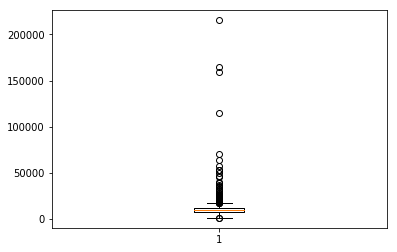

In [22]:
# Identifying outliers for numerical columns

plt.boxplot(housing['LotArea'])
Q1 = housing['LotArea'].quantile(0.25)
Q3 = housing['LotArea'].quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing['LotArea'] >= Q1 - 1.5*IQR) & (housing['LotArea'] <= Q3 + 1.5*IQR)]

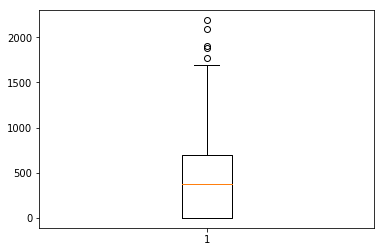

In [23]:
# Identifying outliers for numerical columns

plt.boxplot(housing['BsmtFinSF1'])
Q1 = housing['BsmtFinSF1'].quantile(0.25)
Q3 = housing['BsmtFinSF1'].quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing['BsmtFinSF1'] >= Q1 - 1.5*IQR) & (housing['BsmtFinSF1'] <= Q3 + 1.5*IQR)]

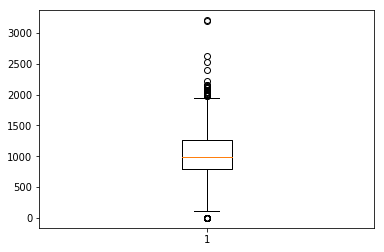

In [24]:
# Identifying outliers for numerical columns

plt.boxplot(housing['TotalBsmtSF'])
Q1 = housing['TotalBsmtSF'].quantile(0.25)
Q3 = housing['TotalBsmtSF'].quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing['TotalBsmtSF'] >= Q1 - 1.5*IQR) & (housing['TotalBsmtSF'] <= Q3 + 1.5*IQR)]

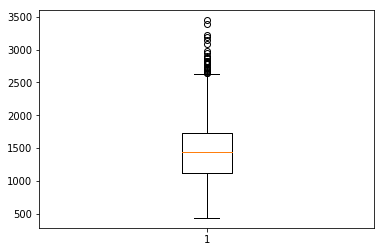

In [25]:
# Identifying outliers for numerical columns

plt.boxplot(housing['GrLivArea'])
Q1 = housing['GrLivArea'].quantile(0.25)
Q3 = housing['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing['GrLivArea'] >= Q1 - 1.5*IQR) & (housing['GrLivArea'] <= Q3 + 1.5*IQR)]

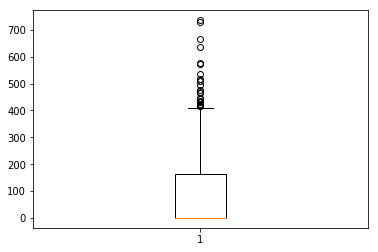

In [26]:
# Identifying outliers for numerical columns

plt.boxplot(housing['WoodDeckSF'])
Q1 = housing['WoodDeckSF'].quantile(0.25)
Q3 = housing['WoodDeckSF'].quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing['WoodDeckSF'] >= Q1 - 1.5*IQR) & (housing['WoodDeckSF'] <= Q3 + 1.5*IQR)]

In [27]:
housing.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,66.534902,9098.174902,6.050980,5.589804,1971.542745,1985.076863,92.090196,424.086275,568.114510,1034.964706,1109.868235,327.552941,1441.923922,0.414118,0.059608,1.526275,0.376471,2.828235,1.037647,6.342745,0.557647,1976.574118,1.720784,456.790588,81.509804,43.701176,6.334118,2007.814902,171908.147451
std,18.886158,3148.325225,1.280725,1.091018,30.380326,20.624635,158.327648,405.992936,419.778496,331.313438,320.616865,408.537729,420.962023,0.509983,0.243390,0.528519,0.502188,0.772051,0.202405,1.442574,0.612861,26.650505,0.730905,201.675398,103.768984,60.980909,2.715683,1.325489,63024.063613
min,21.000000,1491.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,60.000000,7313.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,247.000000,798.000000,864.000000,0.000000,1115.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1959.000000,1.000000,308.000000,0.000000,0.000000,5.000000,2007.000000,129250.000000
50%,62.000000,9142.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.000000,485.000000,976.000000,1055.000000,0.000000,1422.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1978.000000,2.000000,468.000000,0.000000,24.000000,6.000000,2008.000000,159000.000000
75%,78.000000,11034.500000,7.000000,6.000000,2001.000000,2004.000000,148.500000,693.000000,798.500000,1243.000000,1315.000000,713.500000,1712.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,573.000000,158.500000,64.000000,8.000000,2009.000000,202782.500000
max,182.000000,17671.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,1646.000000,1935.000000,1935.000000,2158.000000,1611.000000,2634.000000,3.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1069.000000,409.000000,523.000000,12.000000,2010.000000,451950.000000


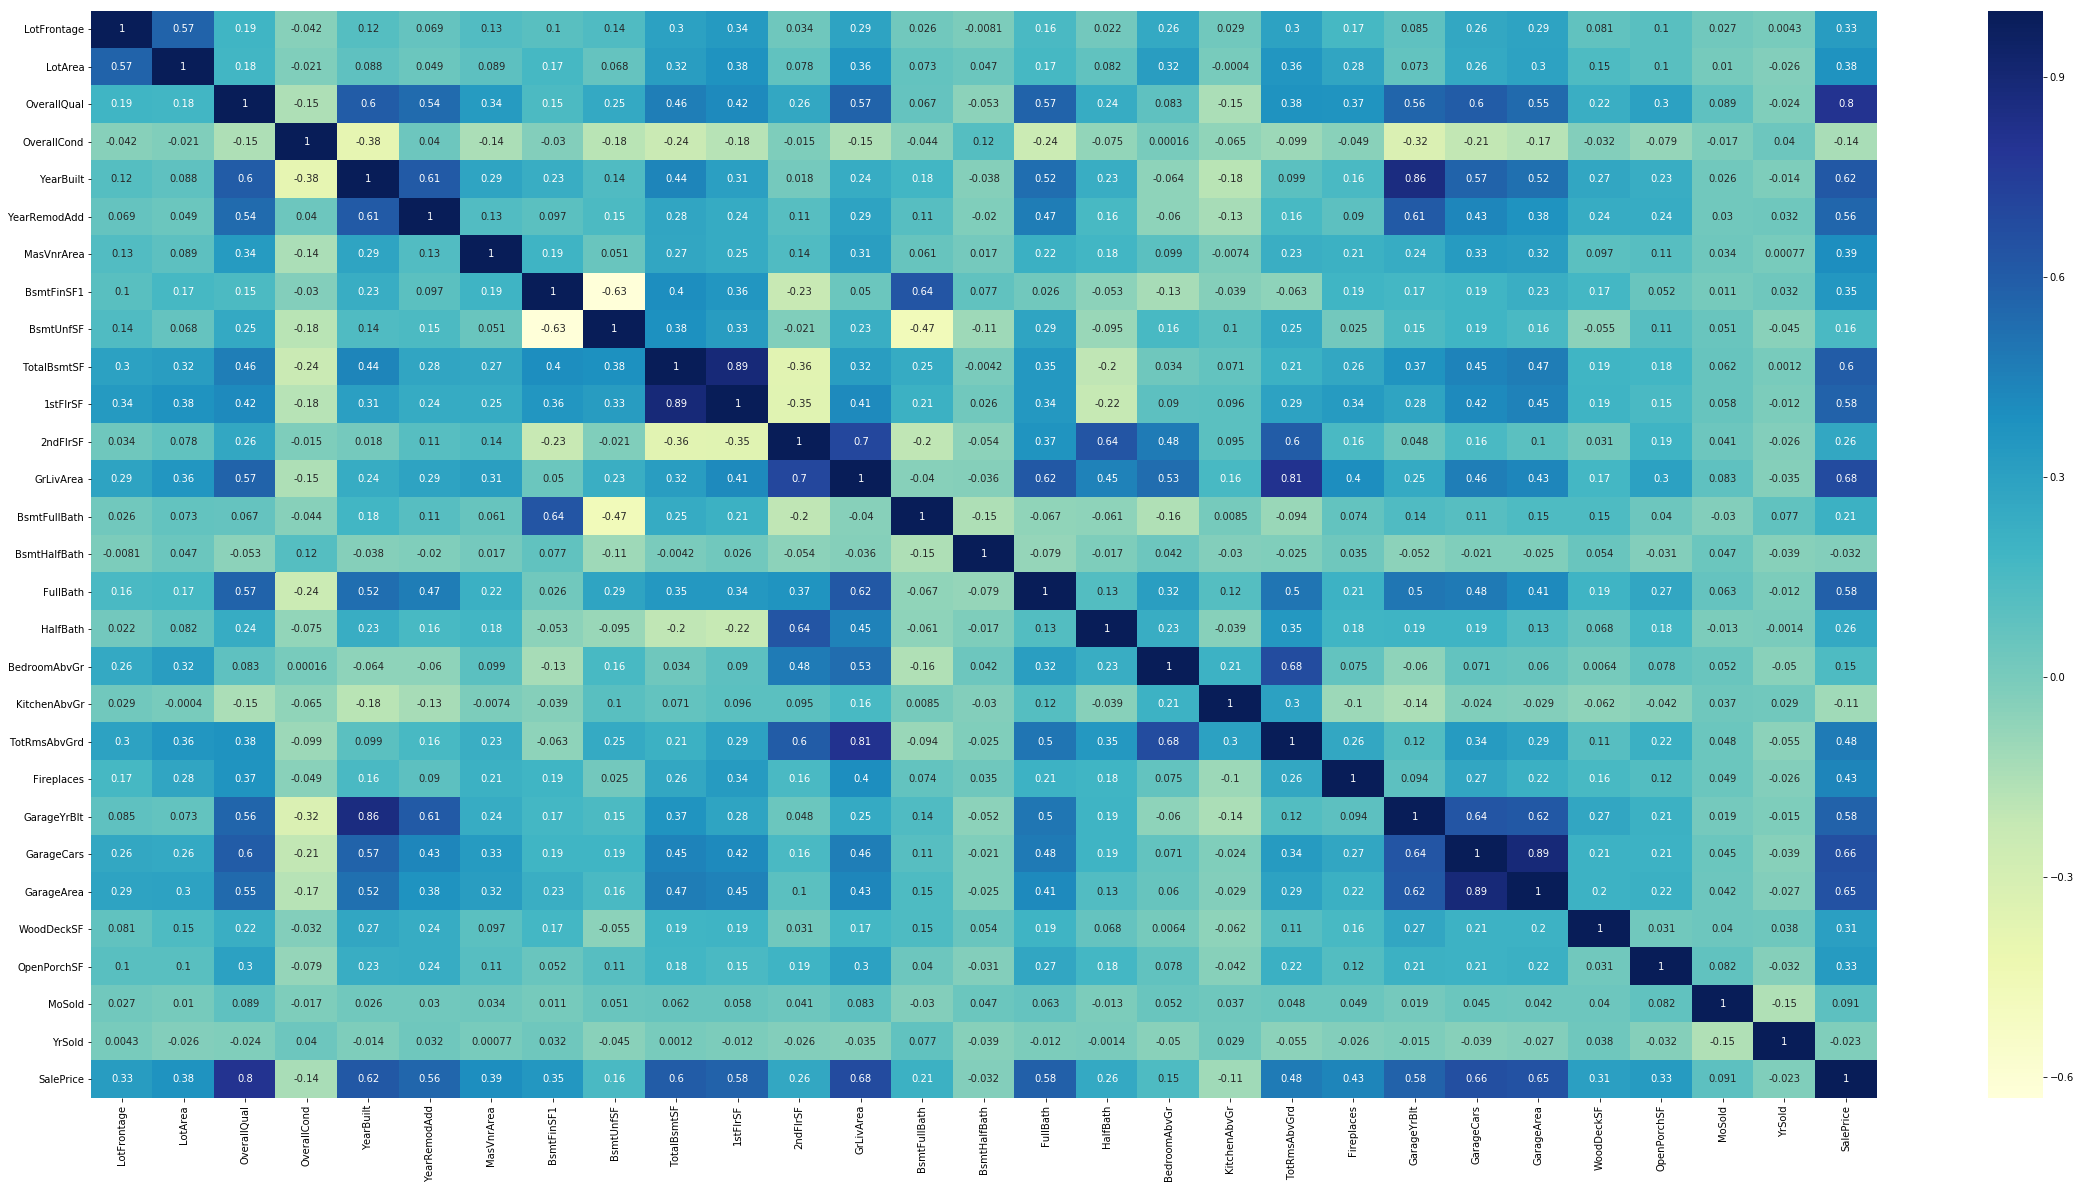

In [28]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,20))      # Size of the figure
sns.heatmap(housing.corr(),annot = True, cmap="YlGnBu")
plt.show()

Dropping highly co-linear columns:
1. GarageArea and GarageCars are highly colinear. We can drop GarageCars.
2. TotalBsmtSF is highly colinear with 1stFlrSF. So, we can drop either of these.
2. TotRmsAbvGrd is highly colinear with GrLivArea. So, we can drop TotRmsAbvGrd.
4. GarageYrBlt and YearBuilt are highly colinear. So, we can drop GarageYrBlt.


In [29]:
# Dropping colinear columns
housing.drop(['GarageCars', 'GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd'],axis=1, inplace=True)

In [30]:
# Creating dummy variables:
housing = pd.get_dummies(housing, drop_first=True)
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1458
Columns: 215 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(2), int64(23), uint8(190)
memory usage: 495.6 KB
None


## Model Building and Evaluation

#### Ridge and Lasso Regression

We would use Ridge Regression and Lasso Regression to built models on above dataset and compare both models.

In [31]:
# Creating X and y

y = housing['SalePrice']
X = housing.drop(['SalePrice'], axis=1)

In [32]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [33]:
# Rescaling features using min-max scaler

scaler = MinMaxScaler()

num_cols = [
'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'MoSold',
 'YrSold']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.describe()

C:\Users\arisethi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\arisethi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\arisethi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = 

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NO,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NO,GarageFinish_NO,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NO,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NO,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.00000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,8

### Ridge Regression

In [34]:
# list of alphas to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished
C:\Users\arisethi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [35]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005590,0.000807,0.001191,0.000402,0.0001,{'alpha': 0.0001},-15237.440424,-14471.104477,-15994.022456,-15482.000829,-17359.511048,-15706.899830,960.331272,24,-10299.645712,-10213.715996,-9844.473146,-10041.883850,-9487.148651,-9977.373471,290.469154
1,0.003986,0.000007,0.000632,0.000520,0.001,{'alpha': 0.001},-15222.596242,-14462.315206,-15967.286983,-15475.049019,-17355.308447,-15694.596257,961.376577,23,-10299.905884,-10214.718295,-9846.133283,-10042.125494,-9487.573291,-9978.091249,290.405983
2,0.004421,0.000870,0.000807,0.000404,0.01,{'alpha': 0.01},-15099.760158,-14379.326632,-15740.066342,-15412.502710,-17314.066105,-15587.239454,972.770096,22,-10302.054110,-10224.381275,-9861.157451,-10045.439342,-9491.923840,-9984.991204,289.807071
3,0.007932,0.001503,0.001385,0.000497,0.05,{'alpha': 0.05},-14763.212581,-14084.899526,-15217.588678,-15183.814620,-17148.801290,-15277.744937,1019.677969,20,-10314.032703,-10279.887030,-9906.327131,-10054.385034,-9512.214396,-10013.369259,291.796757
4,0.007979,0.001411,0.000869,0.000448,0.1,{'alpha': 0.1},-14526.922650,-13820.167856,-15003.661566,-14977.878715,-16977.691403,-15059.274036,1049.444482,19,-10333.000764,-10345.885405,-9949.550043,-10071.813140,-9545.402490,-10049.130368,294.217089


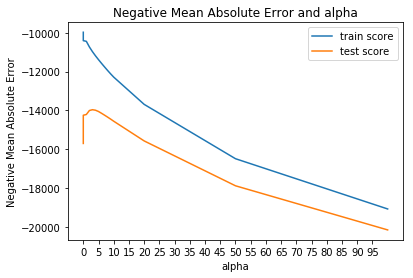

In [36]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'])
plt.xticks(np.arange(0, 100, 5))
plt.show()

In [37]:
# This will give optimum value of alpha based on the above curve and params supplied
model_cv.best_params_

{'alpha': 3.0}

We can see that optimal value of alpha = 3  Negative Mean Absolute error is minimum.

In [38]:
# Setting alpha = 3 and doing ridge regression.
alpha = 3
ridge = Ridge(alpha=alpha, random_state = 100)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 4.25533666e+03,  2.32913168e+04,  4.81977813e+04,  2.35495788e+04,
        2.39618363e+04,  1.25789921e+04,  1.42927794e+04,  2.27137233e+04,
        3.01145106e+03,  3.84646567e+04,  1.54039712e+04,  5.85814985e+04,
        8.07171488e+03,  4.09132767e+03,  1.42030520e+04,  1.06194325e+04,
        2.23777959e+02, -7.54098726e+03,  1.12696466e+04,  2.95549205e+04,
        7.43758852e+03,  5.89863975e+03,  3.54324495e+02,  7.68862651e+02,
       -6.51420612e+03, -1.64315012e+03, -1.30470429e+02,  5.61339375e+03,
        4.28390264e+03,  1.41424953e+03,  2.37523719e+03,  3.50083815e+03,
        7.46847309e+03,  2.25064209e+03, -1.29607793e+02,  2.21713743e+03,
        1.41114291e+03, -5.40685899e+03,  1.37674369e+04,  6.15683160e+03,
        8.75465288e+03,  6.00449007e+03, -1.33823717e+03,  1.80143606e+02,
        2.44840462e+03,  7.48156115e+03, -3.11626257e+03, -1.84941189e+02,
        1.84295634e+03, -7.19369321e+03, -5.76778275e+03, -3.29390585e+03,
       -1.46230272e+03, -

In [39]:
# Transforming test data

X_test[num_cols] = scaler.transform(X_test[num_cols])


C:\Users\arisethi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\arisethi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [40]:
# Getting R-Square of Ridge Regression

ridge_train_score = ridge.score(X_train, y_train)
ridge_test_score = ridge.score(X_test, y_test)
ridge_train_score, ridge_test_score

(0.9380759050997463, 0.9128186184323647)

We are getting train accuracy of .938 and test accuracy of .913 using ridge regression. 

In [41]:
# Creating a dataframe for Ridge Regression Coefficients

model_param_ridge = list(ridge.coef_)
model_param_ridge.insert(0, ridge.intercept_)
model_param_ridge = [round(x, 3) for x in model_param_ridge]

cols = X_train.columns
cols = cols.insert(0, "constant")
ridge_dict = dict(zip(cols, model_param_ridge))
ridge_coeff = pd.DataFrame.from_dict(ridge_dict, orient='index')
ridge_coeff.rename(columns={0: 'Values'}, inplace=True)
ridge_coeff.head(10)

,Values
constant,27537.196
LotFrontage,4255.337
LotArea,23291.317
OverallQual,48197.781
OverallCond,23549.579
YearBuilt,23961.836
YearRemodAdd,12578.992
MasVnrArea,14292.779
BsmtFinSF1,22713.723
BsmtUnfSF,3011.451


In [42]:
ridge_coeff[ridge_coeff['Values'] != 0].shape

(212, 1)

A total of 211 (212 - 1 constant) non-zero variables.

## Lasso

Doing Lasso Regression on the dataset.

In [43]:
params = {'alpha': [0.001, 0.01, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
1.0, 5.0, 10.0, 20, 30, 40, 50, 55, 60, 70, 80, 90, 100, 200, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\arisethi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\arisethi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\arisethi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C

C:\Users\arisethi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\arisethi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\arisethi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\arisethi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\line

C:\Users\arisethi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\arisethi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   11.2s finished
C:\Users\arisethi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  Deprecati

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0, 10.0, 20, 30, 40, 50, 55, 60, 70, 80, 90, 100, 200, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [44]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.155202,0.024920,0.001626,0.000769,0.001,{'alpha': 0.001},-15147.204903,-14448.983263,-16021.954810,-15508.455918,-17360.732076,-15695.449665,976.595062,24,-10300.809827,-10217.257786,-9847.663044,-10042.446571,-9487.809412,-9979.197328,290.816506
1,0.143963,0.023601,0.001787,0.000396,0.01,{'alpha': 0.01},-15176.646917,-14447.614078,-16016.785028,-15506.416978,-17358.807784,-15699.260606,972.785104,25,-10300.878791,-10217.411311,-9847.754251,-10042.559261,-9487.968404,-9979.314403,290.799818
2,0.140629,0.010188,0.001788,0.000754,0.1,{'alpha': 0.1},-15127.609743,-14433.183037,-15970.011224,-15485.005307,-17339.561761,-15669.077179,973.156841,23,-10301.731558,-10219.618690,-9850.088748,-10043.694203,-9489.565406,-9980.939721,290.648885
3,0.158398,0.033209,0.002179,0.000438,0.2,{'alpha': 0.2},-15048.813319,-14416.143006,-15920.179352,-15458.141227,-17316.830448,-15630.004557,976.710802,22,-10303.038582,-10222.197324,-9852.985843,-10045.101835,-9491.160292,-9982.896775,290.622304
4,0.167144,0.024943,0.001369,0.000520,0.3,{'alpha': 0.3},-14988.490980,-14399.639279,-15870.716621,-15433.547290,-17294.132608,-15595.280153,978.286160,21,-10304.771876,-10225.385086,-9855.871142,-10046.445880,-9492.753640,-9985.045525,290.790429


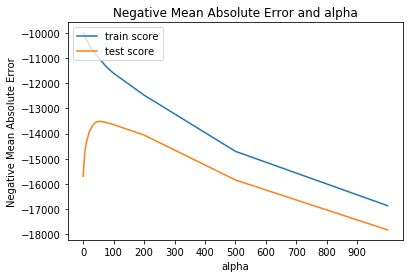

In [45]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xticks(np.arange(0,1000, 100))
plt.show()

In [46]:
cv_results[['param_alpha','mean_test_score']]

,param_alpha,mean_test_score
0,0.001,-15695.449665
1,0.010,-15699.260606
2,0.100,-15669.077179
3,0.200,-15630.004557
4,0.300,-15595.280153
5,0.400,-15564.477137
6,0.500,-15535.070938
7,0.600,-15506.724825
8,0.700,-15479.407604
9,0.800,-15452.290891


In [47]:
model_cv.best_params_

{'alpha': 55}

In [48]:
# We can see that alpha = 55 is the value around which Test Negative mean absolute error is minimum.

alpha = 55
lasso = Lasso(alpha=alpha, random_state=100)
lasso.fit(X_train, y_train) 

Lasso(alpha=55, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=100,
   selection='cyclic', tol=0.0001, warm_start=False)

In [49]:
lasso.coef_

array([ 0.00000000e+00,  2.22123167e+04,  6.80591707e+04,  3.35400062e+04,
        4.60865406e+04,  1.02587697e+04,  1.06651039e+04,  2.16737020e+04,
       -0.00000000e+00,  3.05604562e+04,  0.00000000e+00,  9.45186194e+04,
        7.65108606e+03,  0.00000000e+00,  9.14812946e+02,  5.21124379e+03,
       -2.35821431e+03, -4.00567657e+03,  7.86034119e+03,  2.82144176e+04,
        7.29310174e+03,  6.07875298e+02,  0.00000000e+00,  1.31257150e+02,
       -3.90835246e+03, -0.00000000e+00, -0.00000000e+00,  1.98576261e+03,
        3.84469435e+03, -0.00000000e+00,  0.00000000e+00,  9.66656166e+02,
        4.47903425e+03, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.26273646e+04,  1.02088335e+04,  0.00000000e+00,
        3.00246757e+03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.55936538e+03,  3.84730640e+03, -0.00000000e+00,  0.00000000e+00,
        6.32377379e+02, -3.66212271e+03, -0.00000000e+00, -2.88368714e+03,
       -0.00000000e+00, -

In [50]:
# Getting R-Square of Lasso Regression

lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso.score(X_test, y_test)
lasso_train_score, lasso_test_score

(0.936095451106422, 0.9167504912709171)

This R-Square score is similar to what we got through the Ridge Regression.

In [51]:
# Creating a dataframe for Ridge Regression Coefficients

model_param_lasso = list(lasso.coef_)
model_param_lasso.insert(0, lasso.intercept_)
model_param_lasso = [round(x, 3) for x in model_param_lasso]

cols = X_train.columns
cols = cols.insert(0, "constant")
lasso_dict = dict(zip(cols, model_param_lasso))
lasso_coeff = pd.DataFrame.from_dict(lasso_dict, orient='index')
lasso_coeff.rename(columns={0: 'Values'}, inplace=True)
lasso_coeff.head(10)

,Values
constant,-4290.797
LotFrontage,0.000
LotArea,22212.317
OverallQual,68059.171
OverallCond,33540.006
YearBuilt,46086.541
YearRemodAdd,10258.770
MasVnrArea,10665.104
BsmtFinSF1,21673.702
BsmtUnfSF,-0.000


In [52]:
lasso_coeff[lasso_coeff['Values'] != 0].shape

(117, 1)

We are getting ~ similar R-Square using both Lasso and Ridge Regression. But we will use Lasso as:
    1. Model is less complex (built using 116 features (117- 1 constant) instead of 211 in Ridge).
    2. It is having slightly higher test R-square even with less features.
    3. It is helping us in doing feature selection as well.

C:\Users\arisethi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


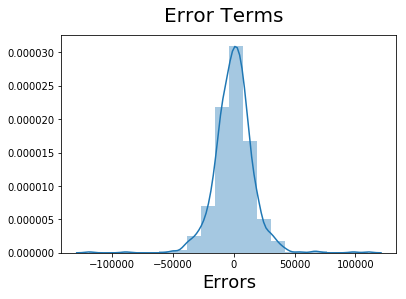

In [53]:
# Plot the histogram of the error terms

fig = plt.figure()
y_train_pred = lasso.predict(X_train)

sns.distplot((y_train - y_train_pred), bins =20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

C:\Users\arisethi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


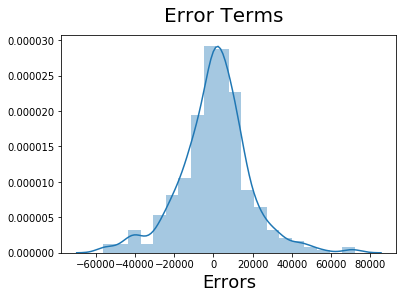

In [54]:
# Plot the histogram of the error terms

fig = plt.figure()

y_test_pred = lasso.predict(X_test)
sns.distplot((y_test - y_test_pred), bins =20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

Error seems to be normally distributed with Mean around zero.

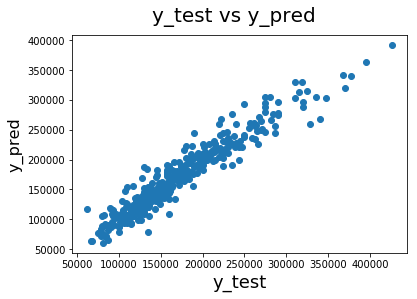

In [55]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()

plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

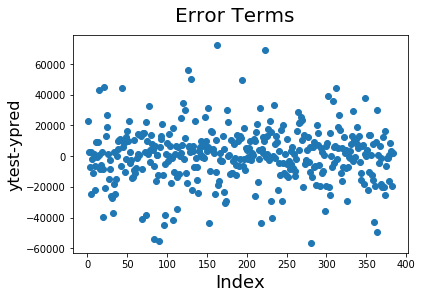

In [56]:
# Plotting error pattern

fig = plt.figure()
c = [i for i in range(1,384,1)]
plt.scatter(c,y_test-y_test_pred)

fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

Error terms dont follow any pattern and seems like noise.

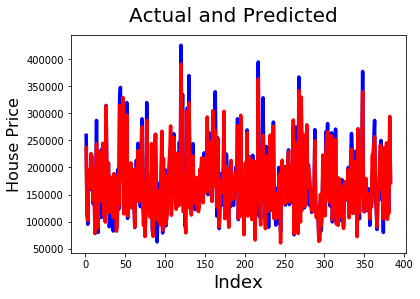

In [57]:
# Actual vs Predicted
c = [i for i in range(1,384,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_test_pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('House Price', fontsize=16)  
plt.show()

So, we have chosen a model with Lasso Regression having 
hyperparameter alpha = 55 
and following coefficients.

In [58]:
lasso_coeff

,Values
constant,-4290.797
LotFrontage,0.000
LotArea,22212.317
OverallQual,68059.171
OverallCond,33540.006
YearBuilt,46086.541
YearRemodAdd,10258.770
MasVnrArea,10665.104
BsmtFinSF1,21673.702
BsmtUnfSF,-0.000
